<a href="https://colab.research.google.com/github/sh4r-KO/SchoolWork/blob/main/NER_Aguirre_CARBOL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### extraction avec soup
on commence par extraire les données depuis soup

In [ ]:
import urllib.request
import requests
from bs4 import BeautifulSoup
import pandas as pd



url = "https://www.lefigaro.fr/flash-actu?page="
  # doc :https://beautiful-soup-4.readthedocs.io/en/latest/#attributes

title_list = []
date_list = []

index_page_fin = 3
for i in range(2,index_page_fin):
  figaro = requests.get(url+str(i)).text
  soup = BeautifulSoup(figaro,"lxml")



  titles = soup.find_all(class_="fig-flash__title")
  dates = soup.find_all(class_="fig-flash__hour")


  for title in titles:
      title_list.append(title.get_text(strip=True))
  for date in dates:
      date_list.append(date['datetime'])

### création du DataFrame

maintenant que nous avons 2 listes grâce au balisage nous les rentrons dans un dataFreame avant de passer aux étapes suivantes.

In [ ]:
df = pd.DataFrame(
    {'titre': title_list,
     'datetime': date_list})
df

,titre,datetime
0,Près de 200 théâtres européens lancent un appe...,2024-12-02CET16:34:27+01:00
1,"Face à la menace d’une chute du gouvernement, ...",2024-12-02CET16:28:56+01:00
2,Les États-Unis limitent l’exportation de semi-...,2024-12-02CET16:24:51+01:00
3,"Policiers, pompiers, mouvement de grève : le d...",2024-12-02CET16:13:00+01:00
4,Manifestations en Géorgie: le premier ministre...,2024-12-02CET16:11:14+01:00
...,...,...
64,«Je ne vivrai pas aussi longtemps que je l’ava...,2024-12-01CET22:51:44+01:00
65,"Ligue 1 : le choc pour l’OM, tombeur de Monaco...",2024-12-01CET22:47:11+01:00
66,La Norvège renonce à l’exploitation minière de...,2024-12-01CET22:28:14+01:00
67,Quatrième nuit de manifestations et de heurts ...,2024-12-01CET22:05:56+01:00


In [ ]:
#!pip install flair

In [ ]:
#https://huggingface.co/flair/ner-french
from flair.data import Sentence
from flair.models import SequenceTagger


tagger = SequenceTagger.load("flair/ner-french")


def extract_entities(text):
    sentence = Sentence(text)
    tagger.predict(sentence)

    entities = []
    for entity in sentence.get_spans('ner'):
        entities.append((entity.text, entity.get_label('ner').value))

    return entities

df['named_entities'] = df['titre'].apply(extract_entities)

df.head()

2024-12-03 11:46:22,478 SequenceTagger predicts: Dictionary with 19 tags: O, S-LOC, B-LOC, E-LOC, I-LOC, S-PER, B-PER, E-PER, I-PER, S-MISC, B-MISC, E-MISC, I-MISC, S-ORG, B-ORG, E-ORG, I-ORG, <START>, <STOP>


,titre,datetime,named_entities
0,Près de 200 théâtres européens lancent un appe...,2024-12-02CET16:34:27+01:00,[]
1,"Face à la menace d’une chute du gouvernement, ...",2024-12-02CET16:28:56+01:00,[]
2,Les États-Unis limitent l’exportation de semi-...,2024-12-02CET16:24:51+01:00,"[(États-Unis, LOC), (la Chine, LOC)]"
3,"Policiers, pompiers, mouvement de grève : le d...",2024-12-02CET16:13:00+01:00,"[(Fête des lumières, MISC), (Lyon, LOC)]"
4,Manifestations en Géorgie: le premier ministre...,2024-12-02CET16:11:14+01:00,"[(Géorgie, LOC), (Irakli Khobadidzé, PER)]"


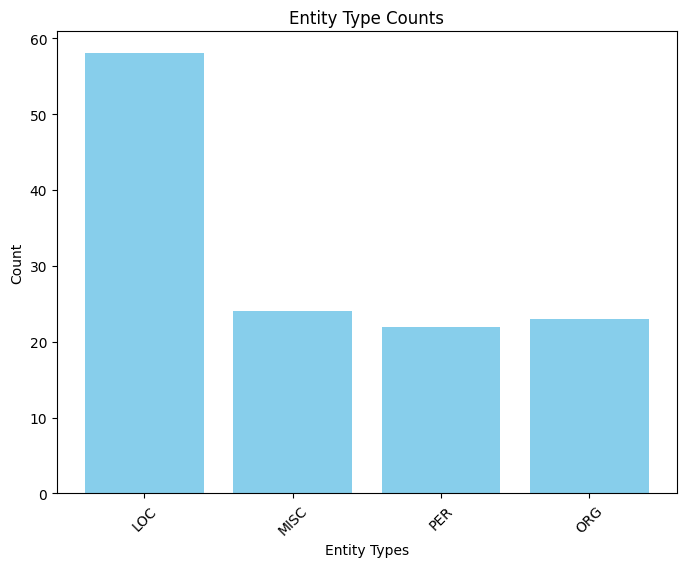

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter


tmp=[]
for i in range(len(df)):
    tmp.append(df['named_entities'][i])


liste_item = [item for sublist in tmp for item in sublist]

#print(liste_item)

entity_types = [entity[1] for entity in liste_item]
#print(entity_types)


entity_counts = Counter(entity_types)

plt.figure(figsize=(8, 6))
plt.bar(entity_counts.keys(), entity_counts.values(), color='skyblue')
plt.title('Entity Type Counts')
plt.xlabel('Entity Types')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()



In [ ]:

entities_by_tag = {}

# Group texts by their tag
for entity, tag in liste_item:
    if tag not in entities_by_tag:
        entities_by_tag[tag] = []
    entities_by_tag[tag].append(entity)

print(entities_by_tag)

most_frequent_per_tag = {}

for tag, texts in entities_by_tag.items():
    most_frequent_text = Counter(texts).most_common(1)[0]
    most_frequent_per_tag[tag] = most_frequent_text

for tag, (text, count) in most_frequent_per_tag.items():
    print(f"The most frequent {tag} is '{text}' with {count} occurrences.")




{'LOC': ['États-Unis', 'la Chine', 'Lyon', 'Géorgie', 'Grande Halle de La Villette', 'Angola', 'Chine', 'Groenland', 'Marseille', 'Grande mosquée de Nantes', 'Russie', 'Suède', 'Russie', 'Moscou', 'Liban', 'Lyon', 'Grève', 'Belgique', 'Congo', 'Géorgie', 'Kremlin', 'Mayotte', 'Nantes', 'Lyon', 'La Rochelle', 'Ré', 'Côtes-d’Armor', 'Espagne', 'Nouvelle-Calédonie', 'Iran', 'Stellantis', 'Français', 'Nice', 'Ukraine', 'Washington', 'Kiev', 'Français', 'US', 'la France', 'Lyon', 'Grenoble', 'Loire-Atlantique', 'Lyon', 'Nice', 'Allemagne', 'Kremlin', 'd’Alep', 'Syrie', 'Maison-Blanche', 'Gaza', 'Royaume-Uni', 'Marseille-Monaco', 'Vélodrome', 'Guinée', 'Monaco', 'Norvège', 'Géorgie', 'Ardennes'], 'MISC': ['Fête des lumières', 'Budget 2025', 'Jeux de l’Amitié', 'Conflits au Proche Orient', 'Budget 2025', 'Conflit Mbappé', 'Vaiana 2au', 'Morgane', 'Free', 'Formule 1 : fin de l’aventure Alpine', 'Tennis : les adieux émouvants', 'Impôts 2024', 'Top 14 : Clermont', 'La Rochelle', 'Vacances d’hive

In [ ]:
df['datetime'] = df['datetime'].str.replace(r'[A-Za-z]', ' ', regex=True)


                                                titre  \
0   Près de 200 théâtres européens lancent un appe...   
1   Face à la menace d’une chute du gouvernement, ...   
2   Les États-Unis limitent l’exportation de semi-...   
3   Policiers, pompiers, mouvement de grève : le d...   
4   Manifestations en Géorgie: le premier ministre...   
..                                                ...   
64  «Je ne vivrai pas aussi longtemps que je l’ava...   
65  Ligue 1 : le choc pour l’OM, tombeur de Monaco...   
66  La Norvège renonce à l’exploitation minière de...   
67  Quatrième nuit de manifestations et de heurts ...   
68  Législative partielle dans les Ardennes : le R...   

                    datetime  \
0  2024-12-02 16:34:27+01:00   
1  2024-12-02 16:28:56+01:00   
2  2024-12-02 16:24:51+01:00   
3  2024-12-02 16:13:00+01:00   
4  2024-12-02 16:11:14+01:00   
..                       ...   
64 2024-12-01 22:51:44+01:00   
65 2024-12-01 22:47:11+01:00   
66 2024-12-01 22:28:14+01:0

<ipython-input-59-9e7bf979b399>:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['datetime'] = pd.to_datetime(df['datetime'],infer_datetime_format= True)


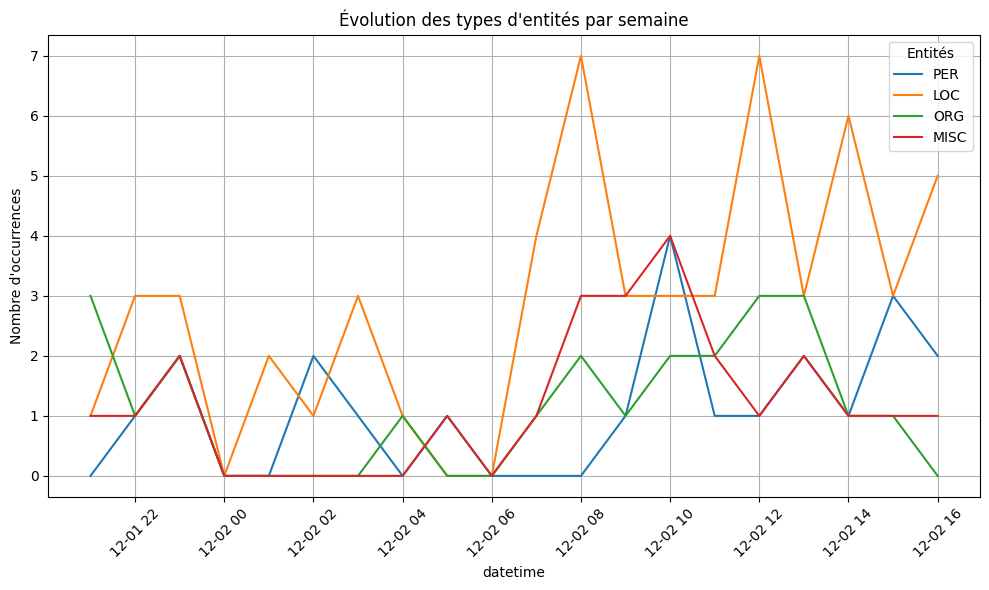

In [ ]:


df['datetime'] = pd.to_datetime(df['datetime'],infer_datetime_format= True)

print(df)

df['Entity_Types'] = df['named_entities'].apply(lambda x: [entity[1] for entity in x])

entity_counts_by_date = pd.DataFrame()

for entity_type in ['PER', 'LOC', 'ORG', 'MISC']:  # Liste des types d'entités
    entity_counts_by_date[entity_type] = df['Entity_Types'].apply(lambda x: x.count(entity_type))

entity_counts_by_date['datetime'] = df['datetime']

entity_counts_by_date = entity_counts_by_date.groupby(pd.Grouper(key='datetime', freq='h')).sum()

plt.figure(figsize=(10, 6))
for entity_type in ['PER', 'LOC', 'ORG', 'MISC']:
    plt.plot(entity_counts_by_date.index, entity_counts_by_date[entity_type], label=entity_type)

plt.title("Évolution des types d'entités par semaine")
plt.xlabel("datetime")
plt.ylabel("Nombre d'occurrences")
plt.legend(title="Entités")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-60-47215dda2b95>:5: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['datetime'] = pd.to_datetime(df['datetime'], infer_datetime_format=True)


                                                titre  \
0   Près de 200 théâtres européens lancent un appe...   
1   Face à la menace d’une chute du gouvernement, ...   
2   Les États-Unis limitent l’exportation de semi-...   
3   Policiers, pompiers, mouvement de grève : le d...   
4   Manifestations en Géorgie: le premier ministre...   
..                                                ...   
64  «Je ne vivrai pas aussi longtemps que je l’ava...   
65  Ligue 1 : le choc pour l’OM, tombeur de Monaco...   
66  La Norvège renonce à l’exploitation minière de...   
67  Quatrième nuit de manifestations et de heurts ...   
68  Législative partielle dans les Ardennes : le R...   

                    datetime  \
0  2024-12-02 16:34:27+01:00   
1  2024-12-02 16:28:56+01:00   
2  2024-12-02 16:24:51+01:00   
3  2024-12-02 16:13:00+01:00   
4  2024-12-02 16:11:14+01:00   
..                       ...   
64 2024-12-01 22:51:44+01:00   
65 2024-12-01 22:47:11+01:00   
66 2024-12-01 22:28:14+01:0

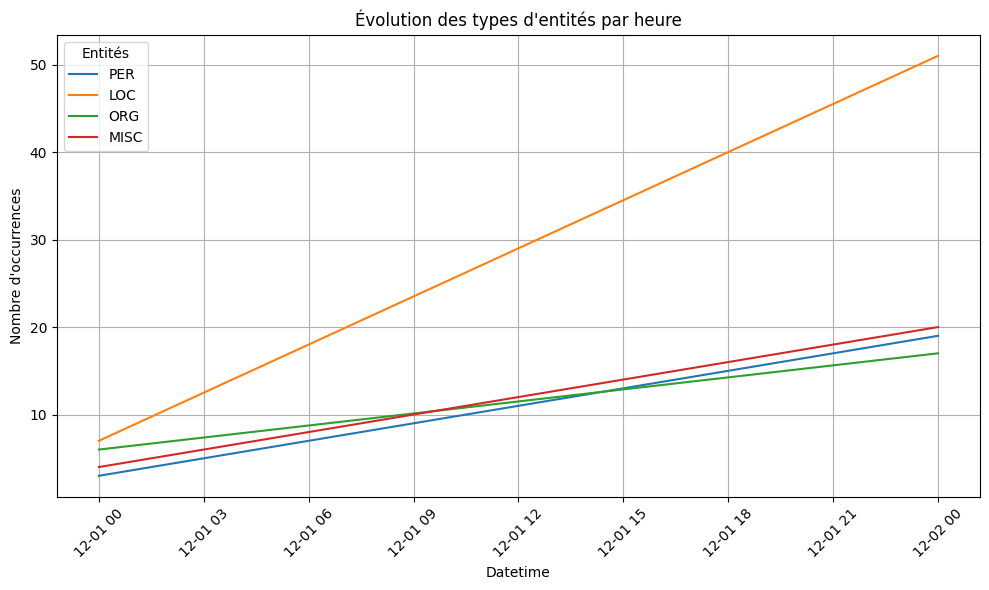

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
df['datetime'] = pd.to_datetime(df['datetime'], infer_datetime_format=True)

# Check the dataframe to ensure 'datetime' is correctly parsed
print(df)

# Extract entity types from 'named_entities'
df['Entity_Types'] = df['named_entities'].apply(lambda x: [entity[1] for entity in x])

entity_counts_by_date = pd.DataFrame()

for entity_type in ['PER', 'LOC', 'ORG', 'MISC']:  # List of entity types
    entity_counts_by_date[entity_type] = df['Entity_Types'].apply(lambda x: x.count(entity_type))

entity_counts_by_date['datetime'] = df['datetime']


entity_counts_by_date = entity_counts_by_date.groupby(pd.Grouper(key='datetime', freq='d')).sum()

print(entity_counts_by_date)

print(entity_counts_by_date)

plt.figure(figsize=(10, 6))

# Plot the entity counts for each type
for entity_type in ['PER', 'LOC', 'ORG', 'MISC']:
    plt.plot(entity_counts_by_date.index, entity_counts_by_date[entity_type], label=entity_type)

# Update the plot title to reflect hourly data
plt.title("Évolution des types d'entités par heure")
plt.xlabel("Datetime")
plt.ylabel("Nombre d'occurrences")
plt.legend(title="Entités")
plt.grid(True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
